# 实验结果分析：Token 生成速度与阈值的关系

本 Notebook 用于分析 `experiment_summary_20260117_030023.json` 中的实验数据。
重点考察 `little_draft_threshold` (对应配置中的 `small_draft_threshold`) 和 `draft_target_threshold` 对 `throughput` (Token 生成速度) 的影响。

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set_theme(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans'] # 尝试支持中文显示，如果没有 SimHei 会回退
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

In [2]:
# 读取数据
file_path = "experiment_summary_20260121_225503.json"

try:
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    print(f"成功读取 {len(data)} 条实验记录")
except FileNotFoundError:
    print(f"找不到文件: {file_path}")
    data = []

# 提取关键信息
extracted_data = []
for entry in data:
    config = entry.get("config", {})
    result = entry.get("result", {})
    
    # 提取阈值和吞吐量、目标模型前向传播次数
    # 注意：根据之前的观察，little_draft_threshold 在 config 中对应的键可能是 "small_draft_threshold"
    little_draft_thresh = config.get("small_draft_threshold")
    draft_target_thresh = config.get("draft_target_threshold")
    throughput = result.get("throughput")
    target_forward_times = result.get("target_forward_times")
    
    if little_draft_thresh is not None and draft_target_thresh is not None and throughput is not None:
        extracted_data.append({
            "little_draft_threshold": float(little_draft_thresh),
            "draft_target_threshold": float(draft_target_thresh),
            "throughput": float(throughput),
            "target_forward_times": float(target_forward_times) if target_forward_times is not None else None
        })

# 创建 DataFrame
df = pd.DataFrame(extracted_data)

# 显示前几行
print(f"提取到 {len(df)} 条有效数据")
display(df.head())
display(df.describe())

成功读取 81 条实验记录
提取到 81 条有效数据


,little_draft_threshold,draft_target_threshold,throughput,target_forward_times
0,0.0,0.0,17.397973,7647.0
1,0.0,0.1,16.987954,7643.0
2,0.0,0.2,17.257525,7584.0
3,0.0,0.3,16.392947,7475.0
4,0.0,0.4,16.016966,7185.0


,little_draft_threshold,draft_target_threshold,throughput,target_forward_times
count,81.000000,81.000000,81.000000,81.000000
mean,0.400000,0.400000,15.373271,6863.320988
std,0.259808,0.259808,2.052007,678.703154
min,0.000000,0.000000,11.685325,5480.000000
25%,0.200000,0.200000,13.559607,6377.000000
50%,0.400000,0.400000,16.139755,6976.000000
75%,0.600000,0.600000,17.014283,7475.000000
max,0.800000,0.800000,19.028845,7647.000000


/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36895 (\N{CJK UNIFIED IDEOGRAPH-901F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs

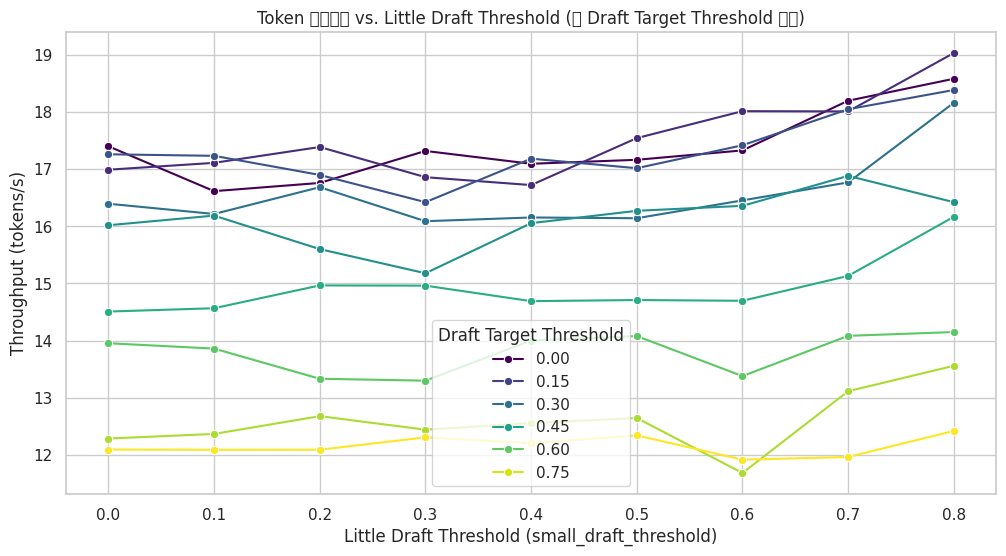

/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36895 (\N{CJK UNIFIED IDEOGRAPH-901F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs

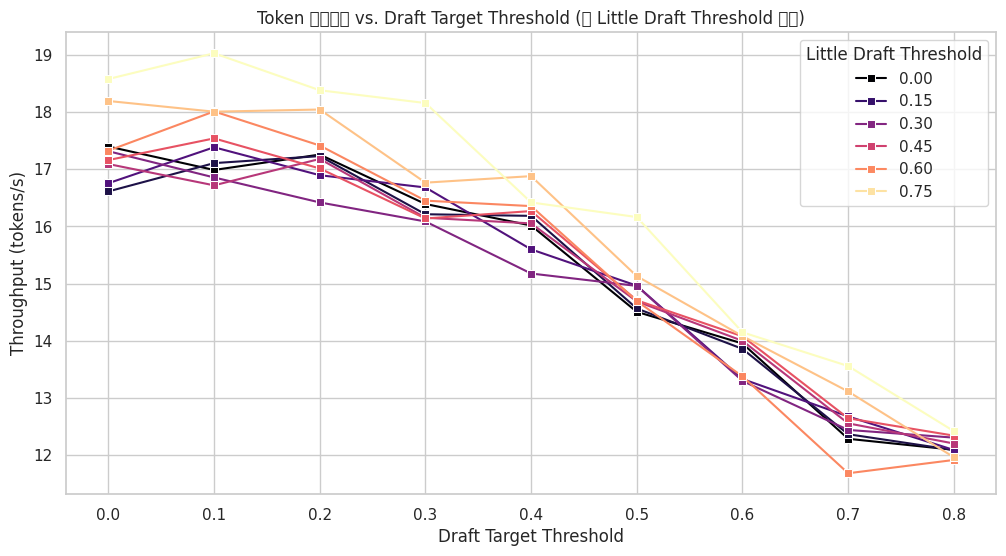

In [3]:
# 绘制折线图
plt.figure(figsize=(12, 6))

# 使用 hue 将 draft_target_threshold 分组
sns.lineplot(
    data=df, 
    x="little_draft_threshold", 
    y="throughput", 
    hue="draft_target_threshold",
    marker="o",
    palette="viridis"
)

plt.title("Token 生成速度 vs. Little Draft Threshold (按 Draft Target Threshold 分组)")
plt.xlabel("Little Draft Threshold (small_draft_threshold)")
plt.ylabel("Throughput (tokens/s)")
plt.legend(title="Draft Target Threshold")
plt.grid(True)
plt.show()

# 此外，也可以反过来画，看 Draft Target Threshold 的影响
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df, 
    x="draft_target_threshold", 
    y="throughput", 
    hue="little_draft_threshold",
    marker="s",
    palette="magma"
)

plt.title("Token 生成速度 vs. Draft Target Threshold (按 Little Draft Threshold 分组)")
plt.xlabel("Draft Target Threshold")
plt.ylabel("Throughput (tokens/s)")
plt.legend(title="Little Draft Threshold")
plt.grid(True)
plt.show()

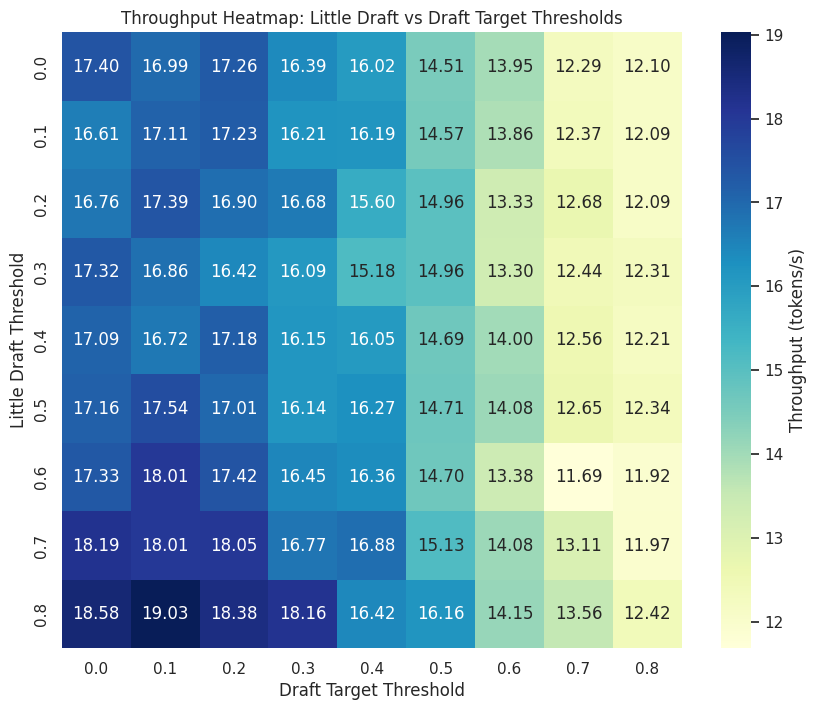

In [4]:
# 绘制热力图

# 1. 重塑数据：行=little_draft_threshold, 列=draft_target_threshold
# 如果同一对 (little_draft_threshold, draft_target_threshold) 有多条数据，默认取平均值
heatmap_data = df.pivot_table(
    index="little_draft_threshold", 
    columns="draft_target_threshold", 
    values="throughput",
    aggfunc='mean'
)

# 2. 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".2f", 
    cmap="YlGnBu", 
    cbar_kws={'label': 'Throughput (tokens/s)'}
)

plt.title("Throughput Heatmap: Little Draft vs Draft Target Thresholds")
# 注意：Heatmap 的 y 轴通常是从上到下的，这里为了直观可能需要根据数值大小排序检查一下
# seaborn 默认会按 index 排序，通常是从小到大，但画在图上是从上到下增长还是减少取决于 seaborn 版本和设置
# 这里默认即可，注意观察坐标轴标签

plt.xlabel("Draft Target Threshold")
plt.ylabel("Little Draft Threshold")
plt.show()

/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25353 (\N{CJK UNIFIED IDEOGRAPH-6309}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32452 (\N{CJK UNIFIED IDEOGRAPH-7EC4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


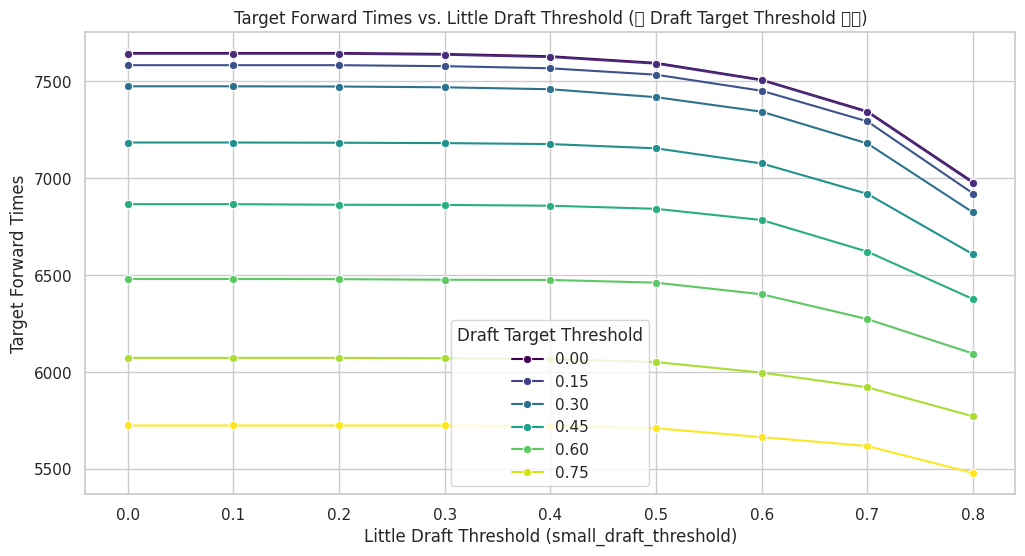

/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25353 (\N{CJK UNIFIED IDEOGRAPH-6309}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32452 (\N{CJK UNIFIED IDEOGRAPH-7EC4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


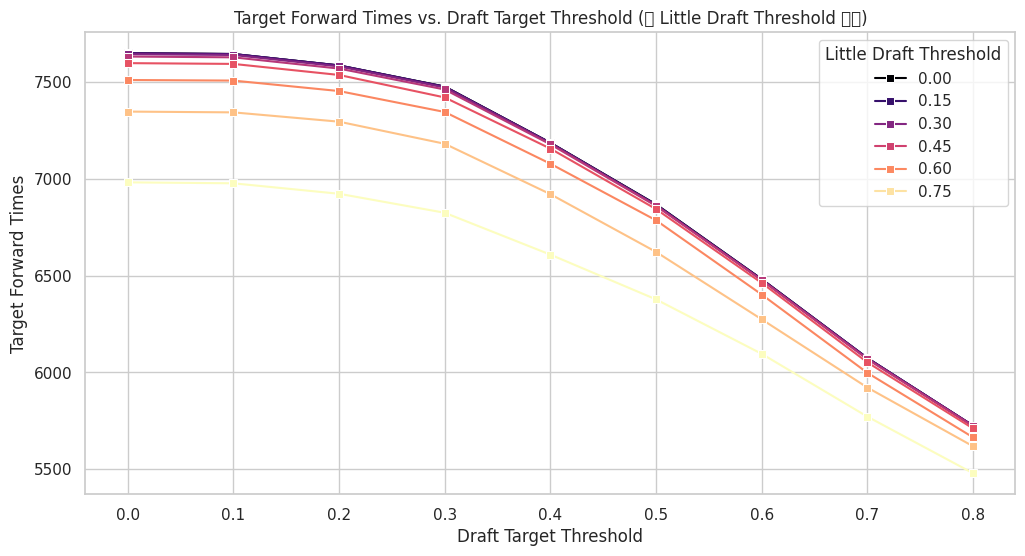

In [5]:
# --- 绘制 Target Forward Times 分析图 ---

# 绘制折线图
plt.figure(figsize=(12, 6))

# 使用 hue 将 draft_target_threshold 分组
sns.lineplot(
    data=df, 
    x="little_draft_threshold", 
    y="target_forward_times", 
    hue="draft_target_threshold",
    marker="o",
    palette="viridis"
)

plt.title("Target Forward Times vs. Little Draft Threshold (按 Draft Target Threshold 分组)")
plt.xlabel("Little Draft Threshold (small_draft_threshold)")
plt.ylabel("Target Forward Times")
plt.legend(title="Draft Target Threshold")
plt.grid(True)
plt.show()

# 反向分组
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df, 
    x="draft_target_threshold", 
    y="target_forward_times", 
    hue="little_draft_threshold",
    marker="s",
    palette="magma"
)

plt.title("Target Forward Times vs. Draft Target Threshold (按 Little Draft Threshold 分组)")
plt.xlabel("Draft Target Threshold")
plt.ylabel("Target Forward Times")
plt.legend(title="Little Draft Threshold")
plt.grid(True)
plt.show()

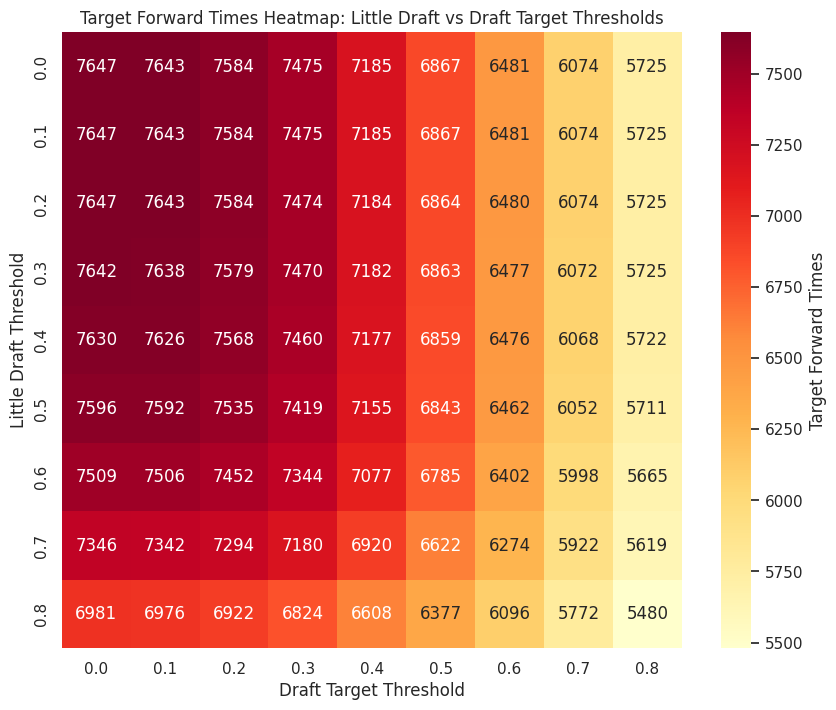

In [6]:
# 绘制 Target Forward Times 热力图

# 1. 重塑数据
heatmap_data_forward = df.pivot_table(
    index="little_draft_threshold", 
    columns="draft_target_threshold", 
    values="target_forward_times",
    aggfunc='mean'
)

# 2. 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data_forward, 
    annot=True, 
    fmt=".0f",  # 次数一般是整数，用 .0f 显示
    cmap="YlOrRd", # 使用不同的颜色映射以区分
    cbar_kws={'label': 'Target Forward Times'}
)

plt.title("Target Forward Times Heatmap: Little Draft vs Draft Target Thresholds")
plt.xlabel("Draft Target Threshold")
plt.ylabel("Little Draft Threshold")
plt.show()